In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
# real_estate_df = pd.read_csv('../Data/Real_Estate.csv', low_memory=False)

real_estate_df = pd.read_csv('../Data/Real_Estate.csv', low_memory=False)

In [177]:
real_estate_df

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN,NaN,NaN
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,NaN,NaN,NaN,NaN
4,200500,2020,09/07/2021,Avon,245 NEW ROAD,217640.0,400000.0,0.5441,Residential,Single Family,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097624,2200073,2022,10/11/2022,Stamford,193 SADDLE HILL ROAD,483380.0,865000.0,0.5588,Residential,Single Family,NaN,NaN,NaN,POINT (-73.577612999 41.148977983)
1097625,220369,2022,09/29/2023,Wethersfield,37 LUCA LN,20650.0,760857.0,0.0271,Residential,Single Family,07 - Change in Property,NEW CONSTRUCTION - NOT COMPLETE FOR 10/1/2022,NaN,POINT (-72.663607 41.712487)
1097626,2200470,2022,01/09/2023,Stamford,1096 EAST MAIN STREET #16-D-1,132900.0,220000.0,0.6040,Residential,Condo,NaN,NaN,NaN,POINT (-73.515726977 41.057837988)
1097627,22396,2022,09/26/2023,Old Saybrook,115 SHEFFIELD ST,1099400.0,1575000.0,0.6980,Residential,Single Family,NaN,NaN,NaN,POINT (-72.368005967 41.289124997)


In [178]:
real_estate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097629 entries, 0 to 1097628
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1097629 non-null  int64  
 1   List Year         1097629 non-null  int64  
 2   Date Recorded     1097627 non-null  object 
 3   Town              1097629 non-null  object 
 4   Address           1097578 non-null  object 
 5   Assessed Value    1097629 non-null  float64
 6   Sale Amount       1097629 non-null  float64
 7   Sales Ratio       1097629 non-null  float64
 8   Property Type     715183 non-null   object 
 9   Residential Type  699240 non-null   object 
 10  Non Use Code      313451 non-null   object 
 11  Assessor Remarks  171228 non-null   object 
 12  OPM remarks       13031 non-null    object 
 13  Location          298111 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 117.2+ MB


In [179]:
real_estate_df.isnull().sum()

Serial Number             0
List Year                 0
Date Recorded             2
Town                      0
Address                  51
Assessed Value            0
Sale Amount               0
Sales Ratio               0
Property Type        382446
Residential Type     398389
Non Use Code         784178
Assessor Remarks     926401
OPM remarks         1084598
Location             799518
dtype: int64

# Dropping unnecessary columns

In [181]:
columns_to_drop = ["Serial Number", "Address", "Non Use Code", "Assessor Remarks", "OPM remarks", "Location"]

# removing location, OPM remarks, Non Use Codes and Assessor Remarks as they contain a very huge portion of null values

In [182]:
real_estate_df = real_estate_df.drop(columns_to_drop, axis=1)

# Dataset Statistics

In [184]:
minimum_sale_price = real_estate_df['Sale Amount'].min()
avg_sale_price = real_estate_df['Sale Amount'].mean()
median_sale_price = real_estate_df['Sale Amount'].median()
std_sale_price = real_estate_df['Sale Amount'].std()

In [185]:
minimum_sale_price = real_estate_df['Sale Amount'].min()
minimum_sale_price

0.0

In [186]:
avg_sale_price = real_estate_df['Sale Amount'].mean()
avg_sale_price

405314.55976191396

In [187]:
median_sale_price = real_estate_df['Sale Amount'].median()
median_sale_price

233000.0

In [188]:
std_sale_price = real_estate_df['Sale Amount'].std()
std_sale_price

5143492.357471125

# Keeping Properties with Valid amount

In [190]:
real_estate_df = real_estate_df[(real_estate_df['Sale Amount'] != 0) & (real_estate_df['Assessed Value'] != 0)]

In [191]:
real_estate_df = real_estate_df.rename(columns = {"Date Recorded" : 'Sales Date', 'Town' : 'City'})
real_estate_df

,List Year,Sales Date,City,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,2020,04/14/2021,Ansonia,133000.0,248400.0,0.5354,Residential,Single Family
1,2020,05/26/2021,Ansonia,110500.0,239900.0,0.4606,Residential,Three Family
2,2020,09/13/2021,Ansonia,150500.0,325000.0,0.4630,Commercial,NaN
3,2020,12/14/2020,Ansonia,127400.0,202500.0,0.6291,Residential,Two Family
4,2020,09/07/2021,Avon,217640.0,400000.0,0.5441,Residential,Single Family
...,...,...,...,...,...,...,...,...
1097624,2022,10/11/2022,Stamford,483380.0,865000.0,0.5588,Residential,Single Family
1097625,2022,09/29/2023,Wethersfield,20650.0,760857.0,0.0271,Residential,Single Family
1097626,2022,01/09/2023,Stamford,132900.0,220000.0,0.6040,Residential,Condo
1097627,2022,09/26/2023,Old Saybrook,1099400.0,1575000.0,0.6980,Residential,Single Family


# Dropping all properties with no property/residential type

In [193]:
real_estate_df = real_estate_df.dropna(subset=['Property Type', 'Residential Type'], how='all')

# Drop Town with Unknown City

In [195]:
real_estate_df = real_estate_df[real_estate_df['City'] != '***Unknown***']
real_estate_df

,List Year,Sales Date,City,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,2020,04/14/2021,Ansonia,133000.0,248400.0,0.5354,Residential,Single Family
1,2020,05/26/2021,Ansonia,110500.0,239900.0,0.4606,Residential,Three Family
2,2020,09/13/2021,Ansonia,150500.0,325000.0,0.4630,Commercial,NaN
3,2020,12/14/2020,Ansonia,127400.0,202500.0,0.6291,Residential,Two Family
4,2020,09/07/2021,Avon,217640.0,400000.0,0.5441,Residential,Single Family
...,...,...,...,...,...,...,...,...
1097624,2022,10/11/2022,Stamford,483380.0,865000.0,0.5588,Residential,Single Family
1097625,2022,09/29/2023,Wethersfield,20650.0,760857.0,0.0271,Residential,Single Family
1097626,2022,01/09/2023,Stamford,132900.0,220000.0,0.6040,Residential,Condo
1097627,2022,09/26/2023,Old Saybrook,1099400.0,1575000.0,0.6980,Residential,Single Family


# Replacing all the residential property type with actual residential type

In [197]:
real_estate_df.loc[real_estate_df['Property Type'] == 'Residential', 'Property Type'] = real_estate_df['Residential Type']

In [198]:
# droppping residential type as it is of no use now

real_estate_df = real_estate_df.drop('Residential Type', axis=1)

In [199]:
# updating to new indices
real_estate_df = real_estate_df.reset_index(drop=True)
real_estate_df

,List Year,Sales Date,City,Assessed Value,Sale Amount,Sales Ratio,Property Type
0,2020,04/14/2021,Ansonia,133000.0,248400.0,0.5354,Single Family
1,2020,05/26/2021,Ansonia,110500.0,239900.0,0.4606,Three Family
2,2020,09/13/2021,Ansonia,150500.0,325000.0,0.4630,Commercial
3,2020,12/14/2020,Ansonia,127400.0,202500.0,0.6291,Two Family
4,2020,09/07/2021,Avon,217640.0,400000.0,0.5441,Single Family
...,...,...,...,...,...,...,...
712750,2022,10/11/2022,Stamford,483380.0,865000.0,0.5588,Single Family
712751,2022,09/29/2023,Wethersfield,20650.0,760857.0,0.0271,Single Family
712752,2022,01/09/2023,Stamford,132900.0,220000.0,0.6040,Condo
712753,2022,09/26/2023,Old Saybrook,1099400.0,1575000.0,0.6980,Single Family


# Datetime conversion of Sales Date

In [201]:
real_estate_df['Sales Date'] = pd.to_datetime(real_estate_df['Sales Date'])
real_estate_df['Sales Year'] = real_estate_df['Sales Date'].dt.year

In [202]:
real_estate_df.to_csv("Processed_Real_Estate_Df.csv")

# Number of sold properties per town.

In [204]:
number_properties_sold_per_town = real_estate_df['City'].value_counts().reset_index()
number_properties_sold_per_town

,City,count
0,Bridgeport,22204
1,Waterbury,22090
2,Stamford,21468
3,Norwalk,17597
4,West Hartford,14374
...,...,...
164,Bozrah,353
165,Hartland,333
166,Canaan,328
167,Scotland,313


In [205]:
import plotly.express as px
fig = px.bar(
    number_properties_sold_per_town.head(10),
    x='City',
    y='count',
    text='count',  # Display count on bars
    title='Count of all Towns',
    labels={'City': 'Town', 'count': 'Number of sold properties'},
    color='City',  # Color bars by country
    color_discrete_sequence=px.colors.qualitative.Set2,  # Distinct colors
    hover_data={'City': True, 'count': True}  # Show country and count on hover
)
fig.show()

# Number of sold properties per year.

In [207]:
number_properties_sold_per_year = real_estate_df['Sales Year'].value_counts().reset_index()
number_properties_sold_per_year

number_properties_sold_per_year.to_csv("Properties_Sold_Per_Year.csv")

In [208]:
number_properties_sold_per_year

,Sales Year,count
0,2021,64279
1,2020,59026
2,2022,52597
3,2019,48236
4,2015,44854
5,2017,44520
6,2016,43565
7,2018,42941
8,2007,40503
9,2014,38042


In [209]:
import plotly.express as px
fig = px.bar(
    number_properties_sold_per_year,
    x='Sales Year',
    y='count',
    text='count',  # Display count on bars
    title='Count of all Years',
    labels={'Sales Year': 'Year', 'count': 'Number of sold properties'},
    color='Sales Year',  # Color bars by country
    color_discrete_sequence=px.colors.qualitative.Set2,  # Distinct colors
    hover_data={'Sales Year': True, 'count': True}  # Show country and count on hover
)
fig.show()

# What is the average sale price of properties in each town?

In [211]:
average_sale_price = real_estate_df.groupby('City')['Sale Amount'].mean().reset_index().sort_values(by='Sale Amount', ascending = False)
average_sale_price

,City,Sale Amount
159,Willington,6.520148e+06
56,Greenwich,2.138700e+06
34,Darien,1.691203e+06
89,New Canaan,1.573673e+06
157,Westport,1.518927e+06
...,...,...
88,New Britain,1.652495e+05
41,East Hartford,1.632457e+05
162,Windham,1.620809e+05
142,Torrington,1.591750e+05


<Axes: xlabel='City'>

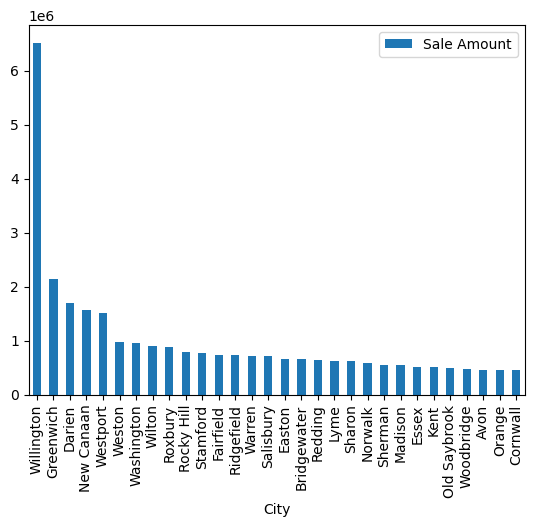

In [212]:
average_sale_price.head(30).plot('City', kind='bar')

# How have property sale prices changed over the years?

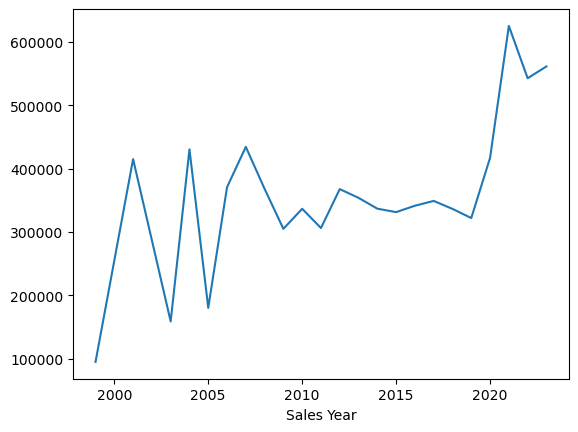

In [214]:
sale_price_trend = real_estate_df.groupby('Sales Year')['Sale Amount'].mean()
sale_price_trend.plot(x='List Year', y='Sale Amount', kind='line');

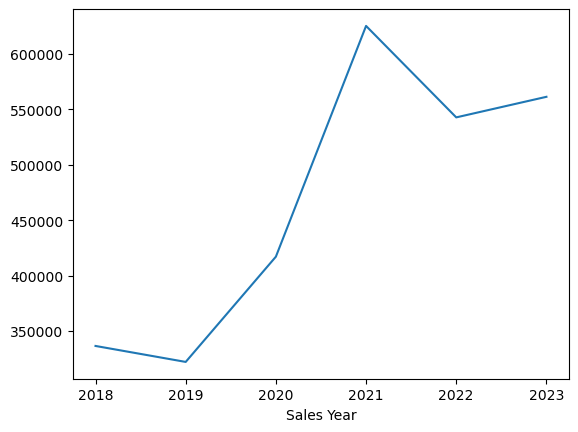

In [215]:
sale_price_trend.loc[2018:].plot(x='Sales Year', y='Sale Amount', kind='line');

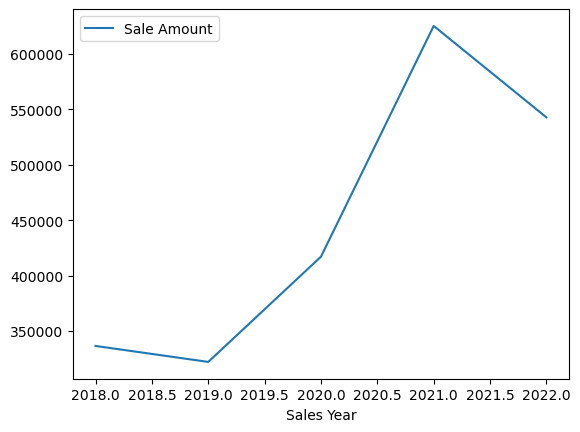

In [216]:
real_estate_df_2018_2022 = real_estate_df[(real_estate_df['Sales Year'] >= 2018) & (real_estate_df['Sales Year'] <= 2022)] #.value_counts().reset_index()
real_estate_df_2018_2022 = real_estate_df_2018_2022.groupby('Sales Year')['Sale Amount'].mean().reset_index()
real_estate_df_2018_2022['Sales Year'] = real_estate_df_2018_2022['Sales Year'].astype(int)
real_estate_df_2018_2022.plot(x='Sales Year', y='Sale Amount', kind='line');

# remove this zaheer bhai. this is additional

In [217]:
real_estate_df_2018_2022

,Sales Year,Sale Amount
0,2018,336530.429680
1,2019,322120.878283
2,2020,417105.627249
3,2021,625340.495586
4,2022,542801.569261


# Which towns have the highest and lowest sale prices?

In [219]:
sale_price_comparison_town = real_estate_df.groupby('City')['Sale Amount'].mean().reset_index().sort_values(by='Sale Amount', ascending=True)
sale_price_comparison_town.head()

,City,Sale Amount
150,Waterbury,147836.735899
142,Torrington,159174.960235
162,Windham,162080.927110
41,East Hartford,163245.708276
88,New Britain,165249.468219


In [220]:
sale_price_comparison_town.tail()

,City,Sale Amount
157,Westport,1.518927e+06
89,New Canaan,1.573673e+06
34,Darien,1.691203e+06
56,Greenwich,2.138700e+06
159,Willington,6.520148e+06


# Do sale prices match the assessed property values?

In [222]:
real_estate_df.head()

,List Year,Sales Date,City,Assessed Value,Sale Amount,Sales Ratio,Property Type,Sales Year
0,2020,2021-04-14,Ansonia,133000.0,248400.0,0.5354,Single Family,2021
1,2020,2021-05-26,Ansonia,110500.0,239900.0,0.4606,Three Family,2021
2,2020,2021-09-13,Ansonia,150500.0,325000.0,0.4630,Commercial,2021
3,2020,2020-12-14,Ansonia,127400.0,202500.0,0.6291,Two Family,2020
4,2020,2021-09-07,Avon,217640.0,400000.0,0.5441,Single Family,2021


In [223]:
real_estate_df['difference_value'] = real_estate_df['Sale Amount'] - real_estate_df['Assessed Value']
real_estate_df

,List Year,Sales Date,City,Assessed Value,Sale Amount,Sales Ratio,Property Type,Sales Year,difference_value
0,2020,2021-04-14,Ansonia,133000.0,248400.0,0.5354,Single Family,2021,115400.0
1,2020,2021-05-26,Ansonia,110500.0,239900.0,0.4606,Three Family,2021,129400.0
2,2020,2021-09-13,Ansonia,150500.0,325000.0,0.4630,Commercial,2021,174500.0
3,2020,2020-12-14,Ansonia,127400.0,202500.0,0.6291,Two Family,2020,75100.0
4,2020,2021-09-07,Avon,217640.0,400000.0,0.5441,Single Family,2021,182360.0
...,...,...,...,...,...,...,...,...,...
712750,2022,2022-10-11,Stamford,483380.0,865000.0,0.5588,Single Family,2022,381620.0
712751,2022,2023-09-29,Wethersfield,20650.0,760857.0,0.0271,Single Family,2023,740207.0
712752,2022,2023-01-09,Stamford,132900.0,220000.0,0.6040,Condo,2023,87100.0
712753,2022,2023-09-26,Old Saybrook,1099400.0,1575000.0,0.6980,Single Family,2023,475600.0


In [224]:
avg_price = real_estate_df.groupby(['City', 'Property Type'])['Sales Ratio'].mean().reset_index()

avg_difference_value = avg_price.rename(columns={'difference_value': 'Average_difference_value'})

avg_difference_value.head(20)

,City,Property Type,Sales Ratio
0,Andover,Commercial,0.418900
1,Andover,Single Family,0.855207
2,Andover,Two Family,0.751246
3,Andover,Vacant Land,0.525705
4,Ansonia,Apartments,0.577383
5,Ansonia,Commercial,0.829106
6,Ansonia,Condo,1.108793
7,Ansonia,Four Family,0.748857
8,Ansonia,Industrial,0.488714
9,Ansonia,Single Family,0.906139


# What types of properties (residential, commercial, etc.) are sold most often?

In [226]:
count_of_properties_type = real_estate_df['Property Type'].value_counts().reset_index()
count_of_properties_type

,Property Type,count
0,Single Family,507087
1,Condo,135538
2,Two Family,34824
3,Three Family,16566
4,Vacant Land,7765
5,Commercial,5976
6,Four Family,2958
7,Apartments,1236
8,Industrial,795
9,Public Utility,10


In [227]:
import plotly.express as px
fig = px.bar(
    count_of_properties_type.head(5),
    x='Property Type',
    y='count',
    text='count',  # Display count on bars
    title='Count of property type',
    labels={'Property Type': 'Property Type', 'count': 'Count'},
    color='Property Type',  # Color bars by country
    color_discrete_sequence=px.colors.qualitative.Set2,  # Distinct colors
    hover_data={'Property Type': True, 'count': True}  # Show country and count on hover
)
fig.show()

# How do sale prices compare for different property types?

In [229]:
transaction_avg_comparision = pd.merge(number_properties_sold_per_town,average_sale_price,on='City',how='outer').sort_values(by='Sale Amount', ascending=False)
transaction_avg_comparision.head(50)

,City,count,Sale Amount
159,Willington,886,6.520148e+06
56,Greenwich,13172,2.138700e+06
34,Darien,5294,1.691203e+06
89,New Canaan,5480,1.573673e+06
157,Westport,7135,1.518927e+06
156,Weston,2633,9.816976e+05
149,Washington,1143,9.581952e+05
160,Wilton,4137,9.044377e+05
119,Roxbury,600,8.731626e+05
118,Rocky Hill,3984,7.902664e+05


# What is the percentage of properties sold below the assessed value?

In [231]:
sold_below_assessed_value = real_estate_df[real_estate_df['difference_value']<=0]
sold_below_assessed_value

,List Year,Sales Date,City,Assessed Value,Sale Amount,Sales Ratio,Property Type,Sales Year,difference_value
25,2020,2021-01-06,Bristol,47530.0,44900.0,1.0585,Vacant Land,2021,-2630.0
40,2020,2021-04-29,Coventry,83400.0,65000.0,1.2830,Single Family,2021,-18400.0
206,2020,2020-10-16,Portland,56420.0,56400.0,1.0003,Vacant Land,2020,-20.0
312,2020,2020-12-01,Colebrook,203700.0,178000.0,1.1443,Single Family,2020,-25700.0
348,2020,2021-05-06,East Lyme,334600.0,260000.0,1.2869,Single Family,2021,-74600.0
...,...,...,...,...,...,...,...,...,...
712694,2022,2022-12-19,Windsor Locks,124180.0,110000.0,1.1289,Single Family,2022,-14180.0
712707,2022,2023-02-24,Stamford,373750.0,250000.0,1.4950,Two Family,2023,-123750.0
712733,2022,2023-01-18,Weston,2189810.0,1183311.0,1.8505,Single Family,2023,-1006499.0
712744,2022,2022-11-23,Plymouth,38080.0,25000.0,1.5232,Vacant Land,2022,-13080.0


# How do sale prices compare for different property types?

In [233]:
avg_price_per_property = real_estate_df.groupby(['City', 'Property Type'])['Sale Amount'].mean().reset_index()

avg_price_per_property = avg_price_per_property.rename(columns={'Sale Amount': 'Average Sale Price'})

avg_price_per_property.head(100)

,City,Property Type,Average Sale Price
0,Andover,Commercial,1.367500e+06
1,Andover,Single Family,2.540316e+05
2,Andover,Two Family,2.641000e+05
3,Andover,Vacant Land,1.331319e+05
4,Ansonia,Apartments,6.021667e+05
...,...,...,...
95,Branford,Single Family,4.102281e+05
96,Branford,Three Family,3.756471e+05
97,Branford,Two Family,3.369013e+05
98,Branford,Vacant Land,2.785448e+05


# Assessed Sales Ratio Trend with Properties in Towns

In [235]:
median_asr_df = real_estate_df.groupby(['City', 'Sales Year', 'Property Type'], as_index=False)['Sales Ratio'].median()

median_asr_df['ASR Trend'] = 'Stable'

median_asr_df['Previous ASR'] = median_asr_df.groupby(['City', 'Property Type'])['Sales Ratio'].shift(1)

median_asr_df.loc[median_asr_df['Sales Ratio'] > median_asr_df['Previous ASR'], 'ASR Trend'] = 'Increasing'
median_asr_df.loc[median_asr_df['Sales Ratio'] < median_asr_df['Previous ASR'], 'ASR Trend'] = 'Decreasing'

median_asr_df.loc[median_asr_df['Previous ASR'].isna(), 'ASR Trend'] = 'Stable'

In [236]:
median_asr_df.head(30)

,City,Sales Year,Property Type,Sales Ratio,ASR Trend,Previous ASR
0,Andover,2007,Single Family,0.705319,Stable,NaN
1,Andover,2008,Single Family,0.680764,Decreasing,0.705319
2,Andover,2009,Single Family,0.749369,Increasing,0.680764
3,Andover,2010,Single Family,0.798071,Increasing,0.749369
4,Andover,2011,Single Family,0.788410,Decreasing,0.798071
5,Andover,2012,Single Family,0.742632,Decreasing,0.788410
6,Andover,2013,Single Family,0.698228,Decreasing,0.742632
7,Andover,2013,Two Family,1.062400,Stable,NaN
8,Andover,2014,Single Family,0.712195,Increasing,0.698228
9,Andover,2014,Two Family,0.570066,Decreasing,1.062400


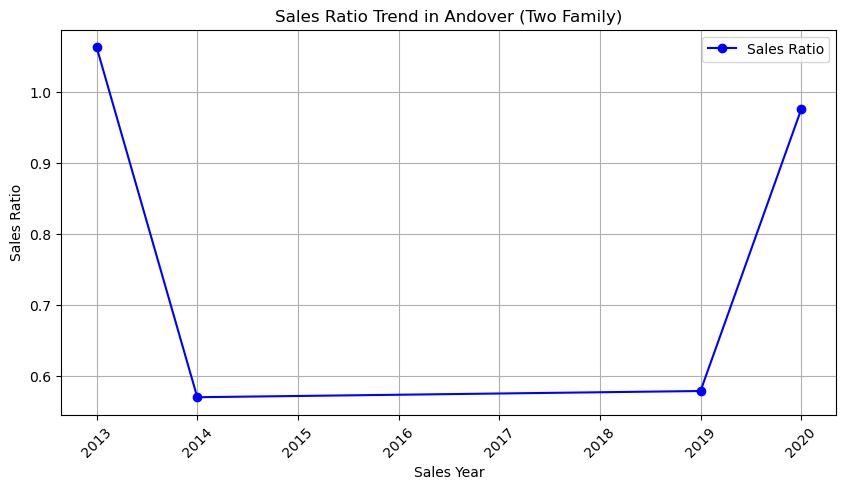

In [237]:
import matplotlib.pyplot as plt

def plot_sales_ratio_trend(df, city, property_type):
    """
    Plots the Sales Ratio trend over time for a given City and Property Type.

    Parameters:
        df (DataFrame): The DataFrame containing Sales Ratio data.
        city (str): The city name to filter data.
        property_type (str): The property type to filter data.
    """
    # Filter data for the selected city and property type
    filtered_df = df[(df["City"] == city) & (df["Property Type"] == property_type)]

    # Sort data by Sales Year
    filtered_df = filtered_df.sort_values("Sales Year")

    # Check if data exists for the given filters
    if filtered_df.empty:
        print(f"No data found for {city} - {property_type}")
        return

    # Plot the line graph
    plt.figure(figsize=(10, 5))
    plt.plot(filtered_df["Sales Year"], filtered_df["Sales Ratio"], marker="o", linestyle="-", color="b", label="Sales Ratio")

    # Add labels and title
    plt.xlabel("Sales Year")
    plt.ylabel("Sales Ratio")
    plt.title(f"Sales Ratio Trend in {city} ({property_type})")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()

    # Show the graph
    plt.show()


plot_sales_ratio_trend(median_asr_df, "Andover", "Two Family")

In [238]:
median_asr_df.to_csv("ASR_Trend_Per_Property_Per_City.csv")

# Overall ASR Trend

In [240]:
overall_asr_trend = real_estate_df.groupby(["City", "Sales Year"], as_index=False)["Sales Ratio"].median()

overall_asr_trend["ASR Trend"] = "Stable"

overall_asr_trend["Previous ASR"] = overall_asr_trend.groupby("City")["Sales Ratio"].shift(1)

overall_asr_trend.loc[overall_asr_trend["Sales Ratio"] > overall_asr_trend["Previous ASR"], "ASR Trend"] = "Increasing"
overall_asr_trend.loc[overall_asr_trend["Sales Ratio"] < overall_asr_trend["Previous ASR"], "ASR Trend"] = "Decreasing"

In [241]:
overall_asr_trend.to_csv("Overall_ASR_Trend.csv")

# determined whether a property is over-assessed or under-assessed

In [243]:
real_estate_df["Assessment Status"] = ["Over-assessed" if asr > 1 else "Under-assessed" if asr < 1 else "Fairly assessed" for asr in real_estate_df["Sales Ratio"]]

over_assessed = real_estate_df[real_estate_df["Sales Ratio"] > 1]
under_assessed = real_estate_df[real_estate_df["Sales Ratio"] < 1]
fairly_assessed = real_estate_df[real_estate_df["Sales Ratio"] == 1]

In [244]:
over_assessed

,List Year,Sales Date,City,Assessed Value,Sale Amount,Sales Ratio,Property Type,Sales Year,difference_value,Assessment Status
25,2020,2021-01-06,Bristol,47530.0,44900.0,1.0585,Vacant Land,2021,-2630.0,Over-assessed
40,2020,2021-04-29,Coventry,83400.0,65000.0,1.2830,Single Family,2021,-18400.0,Over-assessed
206,2020,2020-10-16,Portland,56420.0,56400.0,1.0003,Vacant Land,2020,-20.0,Over-assessed
312,2020,2020-12-01,Colebrook,203700.0,178000.0,1.1443,Single Family,2020,-25700.0,Over-assessed
348,2020,2021-05-06,East Lyme,334600.0,260000.0,1.2869,Single Family,2021,-74600.0,Over-assessed
...,...,...,...,...,...,...,...,...,...,...
712694,2022,2022-12-19,Windsor Locks,124180.0,110000.0,1.1289,Single Family,2022,-14180.0,Over-assessed
712707,2022,2023-02-24,Stamford,373750.0,250000.0,1.4950,Two Family,2023,-123750.0,Over-assessed
712733,2022,2023-01-18,Weston,2189810.0,1183311.0,1.8505,Single Family,2023,-1006499.0,Over-assessed
712744,2022,2022-11-23,Plymouth,38080.0,25000.0,1.5232,Vacant Land,2022,-13080.0,Over-assessed


In [245]:
under_assessed

,List Year,Sales Date,City,Assessed Value,Sale Amount,Sales Ratio,Property Type,Sales Year,difference_value,Assessment Status
0,2020,2021-04-14,Ansonia,133000.0,248400.0,0.5354,Single Family,2021,115400.0,Under-assessed
1,2020,2021-05-26,Ansonia,110500.0,239900.0,0.4606,Three Family,2021,129400.0,Under-assessed
2,2020,2021-09-13,Ansonia,150500.0,325000.0,0.4630,Commercial,2021,174500.0,Under-assessed
3,2020,2020-12-14,Ansonia,127400.0,202500.0,0.6291,Two Family,2020,75100.0,Under-assessed
4,2020,2021-09-07,Avon,217640.0,400000.0,0.5441,Single Family,2021,182360.0,Under-assessed
...,...,...,...,...,...,...,...,...,...,...
712750,2022,2022-10-11,Stamford,483380.0,865000.0,0.5588,Single Family,2022,381620.0,Under-assessed
712751,2022,2023-09-29,Wethersfield,20650.0,760857.0,0.0271,Single Family,2023,740207.0,Under-assessed
712752,2022,2023-01-09,Stamford,132900.0,220000.0,0.6040,Condo,2023,87100.0,Under-assessed
712753,2022,2023-09-26,Old Saybrook,1099400.0,1575000.0,0.6980,Single Family,2023,475600.0,Under-assessed


In [246]:
fairly_assessed

,List Year,Sales Date,City,Assessed Value,Sale Amount,Sales Ratio,Property Type,Sales Year,difference_value,Assessment Status
7124,2020,2021-06-18,Enfield,110000.0,110000.0,1.0,Single Family,2021,0.0,Fairly assessed
10171,2020,2021-03-03,Bethlehem,205000.0,205000.0,1.0,Single Family,2021,0.0,Fairly assessed
11988,2020,2021-06-15,Groton,6475.0,6475.0,1.0,Single Family,2021,0.0,Fairly assessed
13325,2020,2020-10-08,Killingly,40000.0,40000.0,1.0,Single Family,2020,0.0,Fairly assessed
14614,2020,2021-09-28,Greenwich,420000.0,420000.0,1.0,Vacant Land,2021,0.0,Fairly assessed
...,...,...,...,...,...,...,...,...,...,...
688693,2022,2022-12-12,Cheshire,76760.0,76760.0,1.0,Single Family,2022,0.0,Fairly assessed
689564,2022,2023-02-22,Hartland,30820.0,30820.0,1.0,Vacant Land,2023,0.0,Fairly assessed
698962,2022,2023-04-04,Suffield,405000.0,405000.0,1.0,Three Family,2023,0.0,Fairly assessed
704346,2022,2023-03-28,Sharon,3200.0,3200.0,1.0,Vacant Land,2023,0.0,Fairly assessed


In [247]:
real_estate_df

,List Year,Sales Date,City,Assessed Value,Sale Amount,Sales Ratio,Property Type,Sales Year,difference_value,Assessment Status
0,2020,2021-04-14,Ansonia,133000.0,248400.0,0.5354,Single Family,2021,115400.0,Under-assessed
1,2020,2021-05-26,Ansonia,110500.0,239900.0,0.4606,Three Family,2021,129400.0,Under-assessed
2,2020,2021-09-13,Ansonia,150500.0,325000.0,0.4630,Commercial,2021,174500.0,Under-assessed
3,2020,2020-12-14,Ansonia,127400.0,202500.0,0.6291,Two Family,2020,75100.0,Under-assessed
4,2020,2021-09-07,Avon,217640.0,400000.0,0.5441,Single Family,2021,182360.0,Under-assessed
...,...,...,...,...,...,...,...,...,...,...
712750,2022,2022-10-11,Stamford,483380.0,865000.0,0.5588,Single Family,2022,381620.0,Under-assessed
712751,2022,2023-09-29,Wethersfield,20650.0,760857.0,0.0271,Single Family,2023,740207.0,Under-assessed
712752,2022,2023-01-09,Stamford,132900.0,220000.0,0.6040,Condo,2023,87100.0,Under-assessed
712753,2022,2023-09-26,Old Saybrook,1099400.0,1575000.0,0.6980,Single Family,2023,475600.0,Under-assessed


In [248]:
real_estate_df["Appreciation"] = real_estate_df["Sale Amount"] - real_estate_df["Assessed Value"]

real_estate_df["Investment Status"] = "Neutral"
real_estate_df.loc[(real_estate_df["Sales Ratio"] < 1) & (real_estate_df["Appreciation"] > real_estate_df["Appreciation"].median()), "Investment Status"] = "Good Investment"
real_estate_df.loc[real_estate_df["Sales Ratio"] > 1, "Investment Status"] = "Risky (Over-Assessed)"

real_estate_df.head()

,List Year,Sales Date,City,Assessed Value,Sale Amount,Sales Ratio,Property Type,Sales Year,difference_value,Assessment Status,Appreciation,Investment Status
0,2020,2021-04-14,Ansonia,133000.0,248400.0,0.5354,Single Family,2021,115400.0,Under-assessed,115400.0,Good Investment
1,2020,2021-05-26,Ansonia,110500.0,239900.0,0.4606,Three Family,2021,129400.0,Under-assessed,129400.0,Good Investment
2,2020,2021-09-13,Ansonia,150500.0,325000.0,0.4630,Commercial,2021,174500.0,Under-assessed,174500.0,Good Investment
3,2020,2020-12-14,Ansonia,127400.0,202500.0,0.6291,Two Family,2020,75100.0,Under-assessed,75100.0,Neutral
4,2020,2021-09-07,Avon,217640.0,400000.0,0.5441,Single Family,2021,182360.0,Under-assessed,182360.0,Good Investment


# Which months have the highest number of property sales?

In [250]:
real_estate_df.to_csv("Pre_Processed_Real_Estate_Df.csv")

# delete all the cells below. they don't seem to be relevent

In [252]:
real_estate_df['Sales Year'] = pd.to_datetime(real_estate_df['Sales Year'], errors='coerce')

real_estate_df['Month'] = real_estate_df['Sales Year'].dt.month
real_estate_df['Year'] = real_estate_df['Sales Year'].dt.year

sales_per_month = real_estate_df.groupby(['City', 'Year', 'Month']).size().reset_index(name='Sales Year')
max_sales_per_town = sales_per_month.loc[sales_per_month.groupby('City')['Sales Year'].idxmax()]

max_sales_per_town.head(100)

,City,Year,Month,Sales Year
0,Andover,1970,1,564
1,Ansonia,1970,1,3451
2,Ashford,1970,1,830
3,Avon,1970,1,5333
4,Barkhamsted,1970,1,751
...,...,...,...,...
95,Newington,1970,1,7135
96,Newtown,1970,1,5617
97,Norfolk,1970,1,435
98,North Branford,1970,1,2290


In [253]:
max_sales_per_town.sort_values(by='Sales Year', ascending = True)

,City,Year,Month,Sales Year
144,Union,1970,1,156
122,Scotland,1970,1,313
20,Canaan,1970,1,328
64,Hartland,1970,1,333
12,Bozrah,1970,1,353
...,...,...,...,...
153,West Hartford,1970,1,14374
102,Norwalk,1970,1,17597
134,Stamford,1970,1,21468
150,Waterbury,1970,1,22090


In [254]:
max_sales_per_town.groupby('City')['Month'].value_counts().reset_index()

,City,Month,count
0,Andover,1,1
1,Ansonia,1,1
2,Ashford,1,1
3,Avon,1,1
4,Barkhamsted,1,1
...,...,...,...
164,Windsor Locks,1,1
165,Wolcott,1,1
166,Woodbridge,1,1
167,Woodbury,1,1


In [255]:
sales_per_month = real_estate_df.groupby(['City', 'Year', 'Month']).size().reset_index(name='Sales Count')
sales_per_month

,City,Year,Month,Sales Count
0,Andover,1970,1,564
1,Ansonia,1970,1,3451
2,Ashford,1970,1,830
3,Avon,1970,1,5333
4,Barkhamsted,1970,1,751
...,...,...,...,...
164,Windsor Locks,1970,1,3208
165,Wolcott,1970,1,3594
166,Woodbridge,1970,1,1943
167,Woodbury,1970,1,2352


In [256]:
max_sales_idx = sales_per_month.groupby('City')['Sales Count'].idxmax()
max_sales_idx

City
Andover            0
Ansonia            1
Ashford            2
Avon               3
Barkhamsted        4
                ... 
Windsor Locks    164
Wolcott          165
Woodbridge       166
Woodbury         167
Woodstock        168
Name: Sales Count, Length: 169, dtype: int64

In [257]:
max_sales_per_town = sales_per_month.loc[max_sales_idx]
max_sales_per_town

,City,Year,Month,Sales Count
0,Andover,1970,1,564
1,Ansonia,1970,1,3451
2,Ashford,1970,1,830
3,Avon,1970,1,5333
4,Barkhamsted,1970,1,751
...,...,...,...,...
164,Windsor Locks,1970,1,3208
165,Wolcott,1970,1,3594
166,Woodbridge,1970,1,1943
167,Woodbury,1970,1,2352


In [330]:
real_estate_df

,List Year,Sales Date,City,Assessed Value,Sale Amount,Sales Ratio,Property Type,Sales Year,difference_value,Assessment Status,Appreciation,Investment Status,Month,Year
0,2020,2021-04-14,Ansonia,133000.0,248400.0,0.5354,Single Family,1970-01-01 00:00:00.000002021,115400.0,Under-assessed,115400.0,Good Investment,1,1970
1,2020,2021-05-26,Ansonia,110500.0,239900.0,0.4606,Three Family,1970-01-01 00:00:00.000002021,129400.0,Under-assessed,129400.0,Good Investment,1,1970
2,2020,2021-09-13,Ansonia,150500.0,325000.0,0.4630,Commercial,1970-01-01 00:00:00.000002021,174500.0,Under-assessed,174500.0,Good Investment,1,1970
3,2020,2020-12-14,Ansonia,127400.0,202500.0,0.6291,Two Family,1970-01-01 00:00:00.000002020,75100.0,Under-assessed,75100.0,Neutral,1,1970
4,2020,2021-09-07,Avon,217640.0,400000.0,0.5441,Single Family,1970-01-01 00:00:00.000002021,182360.0,Under-assessed,182360.0,Good Investment,1,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712750,2022,2022-10-11,Stamford,483380.0,865000.0,0.5588,Single Family,1970-01-01 00:00:00.000002022,381620.0,Under-assessed,381620.0,Good Investment,1,1970
712751,2022,2023-09-29,Wethersfield,20650.0,760857.0,0.0271,Single Family,1970-01-01 00:00:00.000002023,740207.0,Under-assessed,740207.0,Good Investment,1,1970
712752,2022,2023-01-09,Stamford,132900.0,220000.0,0.6040,Condo,1970-01-01 00:00:00.000002023,87100.0,Under-assessed,87100.0,Good Investment,1,1970
712753,2022,2023-09-26,Old Saybrook,1099400.0,1575000.0,0.6980,Single Family,1970-01-01 00:00:00.000002023,475600.0,Under-assessed,475600.0,Good Investment,1,1970
